# Let's take a look at the project files

First, load the Google Drive where the project files are stored. Use the file menu on the sidebar. The path to the project files must be edited below...

Install packages that are now installed by default.

In [23]:
!pip install dbfread==2.0.7
!pip install folium

Import all necessary packages...

In [31]:
import json
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from dbfread import DBF

**Setup the main path to the project files.**

This is the path to the files on your Google Drive. You need to change this for your local installation.

In [37]:
path = '/content/drive/MyDrive/Colab Notebooks/Zindi - GeoAI Amazon Basin Secret Runway Detection Challenge/data/geoai-amazon-basin-secret-runway-detection-challenge20240808-18843-d5e7zk/pac_2024_training/'

Let's take a look at the database file. Each record contains an ***id***, ***year of detection***, ***lenght (m?)***, and ***activity status***.

Here we simply print the first 10 records...

In [42]:
# Open the DBF file
table = DBF(path+'pac_2024_training.dbf')

# Iterate over the first 10 records and print them
for i, record in enumerate(table):
    if i >= 10:
        break
    print(record)

OrderedDict([('id', 1), ('yr', 2023), ('largo', 968.918), ('Activo', 0)])
OrderedDict([('id', 2), ('yr', 2022), ('largo', 1105.491), ('Activo', 0)])
OrderedDict([('id', 3), ('yr', 2015), ('largo', 985.018), ('Activo', 0)])
OrderedDict([('id', 4), ('yr', 2020), ('largo', 681.914), ('Activo', 0)])
OrderedDict([('id', 5), ('yr', 2020), ('largo', 699.552), ('Activo', 0)])
OrderedDict([('id', 6), ('yr', 2021), ('largo', 479.657), ('Activo', 0)])
OrderedDict([('id', 7), ('yr', 2021), ('largo', 590.712), ('Activo', 1)])
OrderedDict([('id', 8), ('yr', 2021), ('largo', 724.014), ('Activo', 1)])
OrderedDict([('id', 9), ('yr', 2022), ('largo', 558.365), ('Activo', 1)])
OrderedDict([('id', 10), ('yr', 2022), ('largo', 596.248), ('Activo', 0)])


Not let's take a look at the shape file. Each record contains and ***id***, ***year of detection***, ***length (m?)***, ***activity status***, and a ***LINESTRING*** with coordinates that define points along the airstrip. We open the file, print the header, and plot the data.

   id    yr     largo  Activo  \
0   1  2023   968.918       0   
1   2  2022  1105.491       0   
2   3  2015   985.018       0   
3   4  2020   681.914       0   
4   5  2020   699.552       0   

                                            geometry  
0  LINESTRING (-70.08929 -13.12984, -70.08053 -13...  
1  LINESTRING (-69.16744 -13.62068, -69.17286 -13...  
2  LINESTRING (-69.14225 -13.69451, -69.14190 -13...  
3  LINESTRING (-69.07844 -13.78790, -69.08404 -13...  
4  LINESTRING (-69.07838 -13.78788, -69.08279 -13...  


<Axes: >

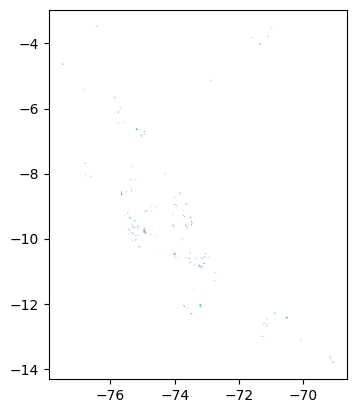

In [47]:
# Read the shapefile
data = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Zindi - GeoAI Amazon Basin Secret Runway Detection Challenge/data/geoai-amazon-basin-secret-runway-detection-challenge20240808-18843-d5e7zk/pac_2024_training/pac_2024_training.shp')

# Display the data
print(data.head())

# Plot the shapefile (if it contains geometric data)
data.plot()

Now, let's make a prettier plot using the folium package. This is an interactive map with OpenStreetMap background. If you zoom in and point at an airstrip, you can see the id, if you click on the airstrip, a popup should show all the attibutes.

In [49]:
# Read the shapefile
data = gpd.read_file(path+'pac_2024_training.shp')

# Get the center coordinates for the map
center = data.geometry.centroid.iloc[0]

# Create a Folium map
m = folium.Map(location=[center.y, center.x], zoom_start=5)

# Add the shapefile to the map with tooltips
for _, row in data.iterrows():
    # Create a GeoJSON feature from the row
    geojson_feature = {
        'type': 'Feature',
        'properties': row.drop('geometry').to_dict(),
        'geometry': row['geometry'].__geo_interface__
    }

    # Create a Folium Popup with the attributes
    popup = folium.Popup(str(row.drop('geometry').to_dict()), max_width=300)

    # Create a Folium GeoJson object and add it to the map
    folium.GeoJson(geojson_feature, tooltip=folium.Tooltip(str(row.name)), popup=popup).add_to(m)

# Display the map
display(m)

<ipython-input-49-02ecc308cdce>:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = data.geometry.centroid.iloc[0]
